In [32]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import pickle

pickle_in = open("vectorized_data/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("vectorized_data/y.pickle","rb")
y = pickle.load(pickle_in)

In [6]:
categories=['Bathroom','Living room']

In [7]:
y=y.reshape(-1,)

# Data shape

In [8]:
print(X.shape)
print(y.shape)

(8187, 150, 150, 3)
(8187,)


# Normalizing the data

In [9]:
X=X/255

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [18]:
y_train.shape

(6549,)

# Checking data after training

In [17]:
import random

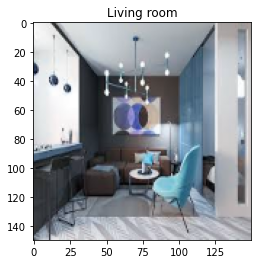

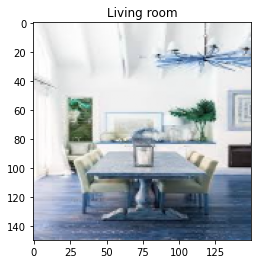

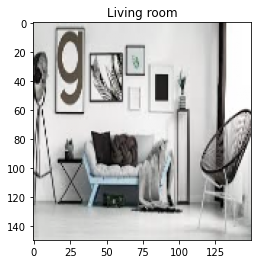

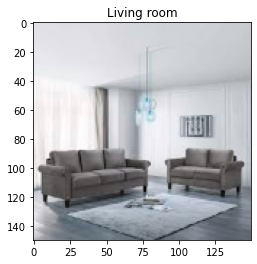

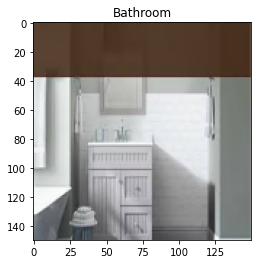

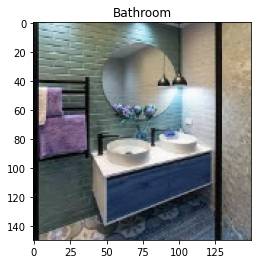

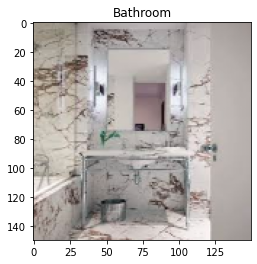

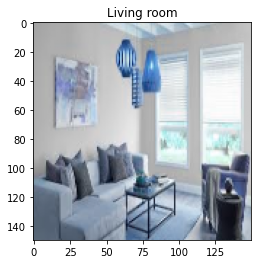

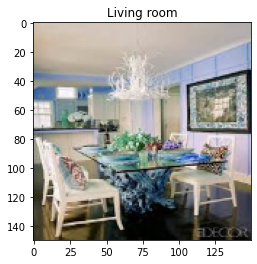

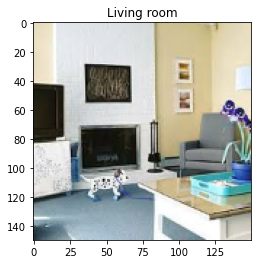

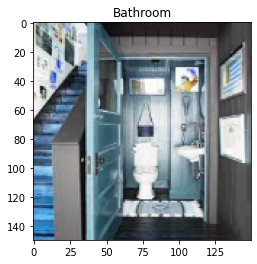

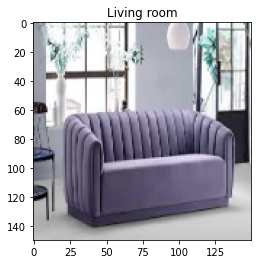

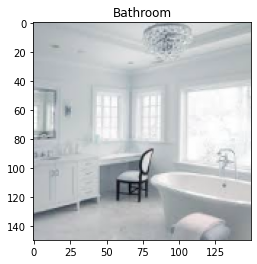

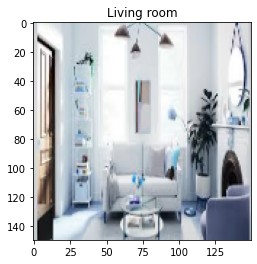

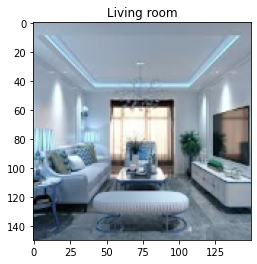

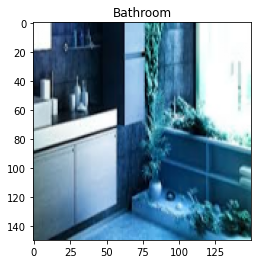

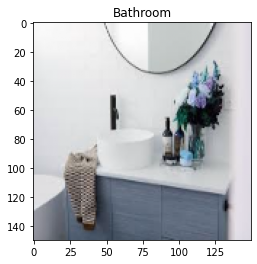

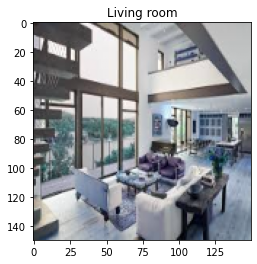

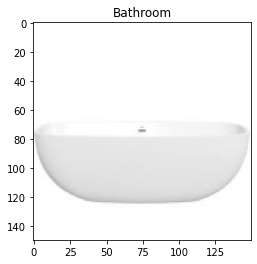

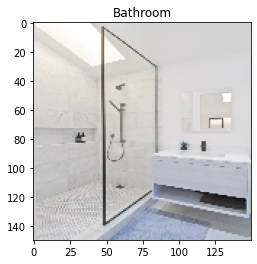

In [19]:
for i in range(20):
    x=random.randint(0,6549)
    plt.imshow(X_train[x])
    plt.title(categories[y_train[x]])
    plt.show()

# Building the model

In [61]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(150, 150,3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    
    layers.Dropout(0.5),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [62]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 9216)            

In [64]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
205/205 [==============================] - 170s 829ms/step - loss: 0.5172 - accuracy: 0.7400
Epoch 2/10
205/205 [==============================] - 100s 488ms/step - loss: 0.4071 - accuracy: 0.8183
Epoch 3/10
205/205 [==============================] - 97s 472ms/step - loss: 0.3780 - accuracy: 0.8322
Epoch 4/10
205/205 [==============================] - 98s 476ms/step - loss: 0.3251 - accuracy: 0.8610
Epoch 5/10
205/205 [==============================] - 96s 469ms/step - loss: 0.2969 - accuracy: 0.8745
Epoch 6/10
205/205 [==============================] - 95s 465ms/step - loss: 0.2605 - accuracy: 0.8893
Epoch 7/10
205/205 [==============================] - 97s 472ms/step - loss: 0.2294 - accuracy: 0.9041
Epoch 8/10
205/205 [==============================] - 96s 469ms/step - loss: 0.2072 - accuracy: 0.9168
Epoch 9/10
205/205 [==============================] - 96s 467ms/step - loss: 0.1823 - accuracy: 0.9238
Epoch 10/10
205/205 [==============================] - 96s 468ms/step -

In [67]:
cnn.evaluate(X_test, y_test)

52/52 [==============================] - 5s 94ms/step - loss: 0.3160 - accuracy: 0.8889


[0.31603512167930603, 0.8888888955116272]

In [103]:
cnn.save('CNN_1.h5')

# Building the second model

In [80]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
cnn2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 18496)           

In [82]:
cnn2.fit(X_train, y_train, epochs=10)

Epoch 1/10
205/205 [==============================] - 114s 555ms/step - loss: 0.5444 - accuracy: 0.7097
Epoch 2/10
205/205 [==============================] - 113s 553ms/step - loss: 0.4079 - accuracy: 0.8142
Epoch 3/10
205/205 [==============================] - 114s 554ms/step - loss: 0.3388 - accuracy: 0.8539
Epoch 4/10
205/205 [==============================] - 116s 564ms/step - loss: 0.2813 - accuracy: 0.8809
Epoch 5/10
205/205 [==============================] - 118s 574ms/step - loss: 0.2159 - accuracy: 0.9122
Epoch 6/10
205/205 [==============================] - 115s 562ms/step - loss: 0.1637 - accuracy: 0.9330
Epoch 7/10
205/205 [==============================] - 115s 562ms/step - loss: 0.1137 - accuracy: 0.9542
Epoch 8/10
205/205 [==============================] - 118s 574ms/step - loss: 0.0708 - accuracy: 0.9690
Epoch 9/10
205/205 [==============================] - 119s 579ms/step - loss: 0.0494 - accuracy: 0.9779
Epoch 10/10
205/205 [==============================] - 115s 562m

In [84]:
cnn2.evaluate(X_test, y_test)

52/52 [==============================] - 7s 141ms/step - loss: 0.8348 - accuracy: 0.8162


[0.8348159193992615, 0.8162392973899841]

In [104]:
cnn2.save('CNN_2.h5')

# Analyse the cnn

In [86]:
Y=cnn.predict(X_test)

In [87]:
y_test_predicted=[]
for i in Y:
    y_test_predicted.append(i.argmax())
y_test_predicted=np.array(y_test_predicted)

In [88]:
y_test_predicted

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [89]:
y_test

array([0, 0, 1, ..., 0, 1, 0])

In [90]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_test_predicted)
cm

array([[723, 109],
       [ 73, 733]], dtype=int64)

In [91]:
ticklabels=['Bathroom', 'Living room']

Text(69.0, 0.5, 'Atual')

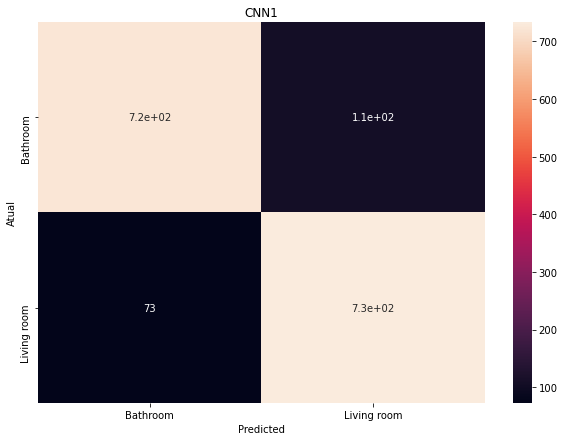

In [93]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,xticklabels=ticklabels,yticklabels=ticklabels)
plt.title('CNN1')
plt.xlabel('Predicted')
plt.ylabel('Atual')

In [95]:
Y=cnn2.predict(X_test)
y_test_predicted=[]
for i in Y:
    y_test_predicted.append(i.argmax())
y_test_predicted=np.array(y_test_predicted)

In [100]:
cm=confusion_matrix(y_test, y_test_predicted)
cm

array([[571, 261],
       [ 40, 766]], dtype=int64)

Text(69.0, 0.5, 'Atual')

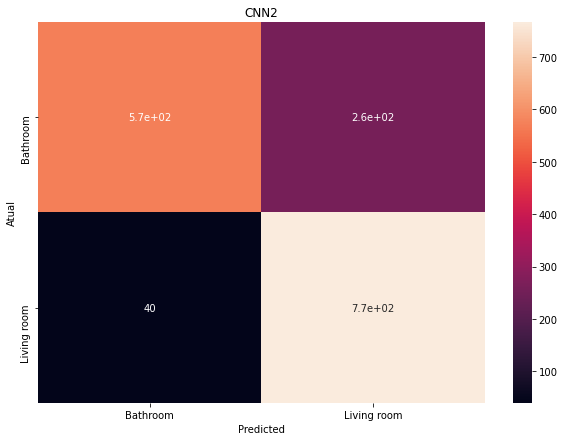

In [101]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,xticklabels=ticklabels,yticklabels=ticklabels)
plt.title('CNN2')
plt.xlabel('Predicted')
plt.ylabel('Atual')